Mapa Logístico

$$x_{n+1} = 4 \lambda x_n (1-x_n) $$

Condição inicial $x_0 = 0.51$; valores de $\lambda$

$$\lambda_1 = 0.70, \lambda_2 = 0.80, \lambda_3 = 0.88, \lambda_4 = 1.0$$

In [1]:
# módulos
import numpy as np
import matplotlib.pyplot as plt

# Condições iniciais
x0 = 0.51
hl = [0.7, 0.8, 0.88, 1.0]
nf = 700

In [2]:
graphs = []

for h in hl:
    yl = [x0]
    nl = [0]
    tx = [x0]
    ty = [0]

    # Setup e calculo do plot de x_n vs x_n+1, indo de 0 -> 1, para fins de visualização do diagrama da teia

    x = 0
    xn, xn1 = [], []

    while x <= 1:
        y = 4 * h * x * (1-x)

        xn.append(x)
        xn1.append(y)

        x+= 0.1


    # Calculo do gráfico de x_n vs n + gráfico da teia
    # tx e ty -> Coordenadas do gráfico teia, conforme técnica mostrada em aula
    # Chamando x_n+1 de y, para facilitar leitura do codigo

    x = x0

    for n in range(1, nf):
        y = 4 * h * x * (1-x)

        yl.append(y)
        nl.append(n)
        tx.append(x)
        ty.append(y)

        x = y

        tx.append(x)
        ty.append(y)


    graphs.append([yl, nl, tx, ty, xn, xn1])    

### Gráficos de $x_n \times n$ para todos os $\lambda_i$

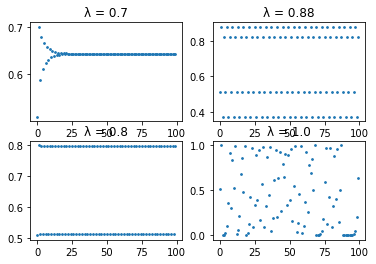

In [3]:
fig, ax = plt.subplots(2, 2)

for i, g in enumerate(graphs):
    if i < 2:
        ax[i, 0].scatter(g[1][:100], g[0][:100], s=3)
        ax[i, 0].set_title(f"λ = {hl[i]}")
    else:
        ax[i-2, 1].scatter(g[1][:100], g[0][:100], s=3)
        ax[i-2, 1].set_title(f"λ = {hl[i]}")
       


plt.show()

### Diagrama da teia para todos os $\lambda_i$

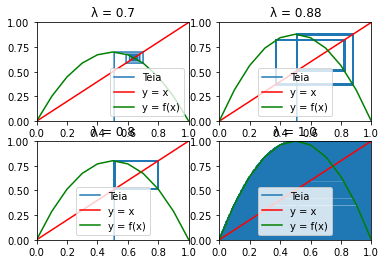

In [4]:
fig, ax = plt.subplots(2, 2)

for i, g in enumerate(graphs):
    if i < 2:
        ax[i, 0].plot(g[2],g[3],  label="Teia")                  # Teia
        ax[i, 0].plot(g[4], g[4], c='red', label="y = x")        # y = x
        ax[i, 0].plot(g[4], g[5], c='green', label="y = f(x)")      # y = x_n+1
        ax[i, 0].set_ylim(0,1)
        ax[i, 0].set_xlim(0,1)
        ax[i, 0].legend()
        ax[i, 0].set_title(f"λ = {hl[i]}")

    else:
        ax[i-2, 1].plot(g[2],g[3], label="Teia")                # Teia
        ax[i-2, 1].plot(g[4], g[4], c='red', label="y = x")      # y = x
        ax[i-2, 1].plot(g[4], g[5], c='green', label="y = f(x)")    # y = x_n+1
        ax[i-2, 1].set_ylim(0,1)
        ax[i-2, 1].set_xlim(0,1)
        ax[i-2, 1].legend()
        ax[i-2, 1].set_title(f"λ = {hl[i]}")
       

plt.show()

---
### Gráfico de recorrência

In [5]:
ret = []
for g in graphs:
    ret_x = []
    ret_y = []
    for i, x in enumerate(g[0]):
        for j, y in enumerate(g[0]):
            if abs(x - y) < 0.00001:
                ret_x.append(i)
                ret_y.append(j)

    ret.append([ret_x, ret_y])


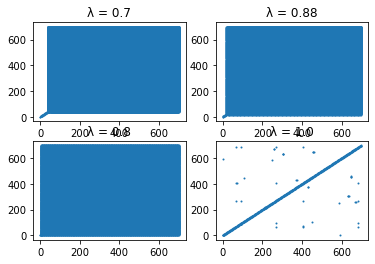

In [6]:
fig, ax = plt.subplots(2, 2)

for i, r in enumerate(ret):
    if i < 2:
        ax[i, 0].scatter(r[1], r[0], s=1)
        ax[i, 0].set_title(f"λ = {hl[i]}")

    else:
        ax[i-2, 1].scatter(r[1], r[0], s=1)
        ax[i-2, 1].set_title(f"λ = {hl[i]}")
        
plt.show()

---

Considerando que:

$$\frac{d}{dx} (4 \lambda x_n (1-x_n)) = \lambda (4-8x)$$

In [7]:
# lista de λ, de 0.4 -> 1, delta=0.01
hbl = np.arange(0.4, 1, 0.001)

# lista de coeficientes de lyapunov
ly = []

# lista de x para o Diagrama de bifurcação
bif = []


for h in hbl:
    x = x0

    # lista temp. para o cálculo do somatório do coef. de lyapunov
    ly_calc = []

# Cálculo dos coef. de lyapunov
    for i in range(700):
        x = 4 * h * x * (1-x)
        ly_calc.append(np.log(abs(h*(4-8*x)))) # Salva os log da derivada na lista
    ly.append(np.mean(ly_calc)) # calcula a média dos log, obtendo o coef. de lyapunov

# Cálculo para o diag. de bifurcação
    for i in range(20):
        x = 4 * h * x * (1-x)
        bif.append(x)

---
### Diagrama de Bifurcação 

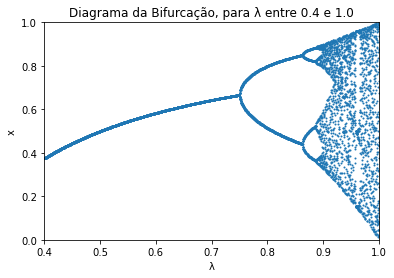

In [8]:
ticks = np.linspace(0.4, 1, len(bif))

plt.scatter(ticks, bif, s=1)
plt.ylim(0, 1)
plt.ylabel("x")
plt.xlim(0.4, 1)
plt.xlabel("λ")

plt.title("Diagrama da Bifurcação, para λ entre 0.4 e 1.0")
plt.show()


---
### Gráfico do Expoente de Lyapunov

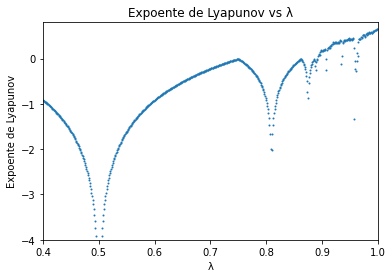

In [9]:
plt.scatter(hbl, ly, s=1)
plt.ylim(-4, 0.8)
plt.ylabel("Expoente de Lyapunov")
plt.xlim(0.4, 1)
plt.xlabel("λ")
plt.title("Expoente de Lyapunov vs λ")
plt.show()